In [598]:
# Import Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Define functions for use throughout notebook


#Function to add dow sorting column to improve visualizations
def dow_sort_column_add_on_dataframe(df):
    # create a list of our conditions
    conditions = [
        (df['dow'] == 'Sun'),
        (df['dow'] == 'Mon'),
        (df['dow'] == 'Tue'),
        (df['dow'] == 'Wed'),
        (df['dow'] == 'Thu'),
        (df['dow'] == 'Fri'),
        (df['dow'] == 'Sat')
        ]
    # create a list of the values we want to assign for each condition
    values = [1,2,3,4,5,6,7]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['dow_sort'] = np.select(conditions, values)
    return df

#Function to calculate conversion to 100 user ratio
def Add_User_Converted_Ratio(df):
    df['Conversion to User Ratio'] = df['converted']/df['users']*100
    return df
    
    
#Function to create stacked bar chart of user or conversion per day of the week per year
def Users_Conversions_Per_Dow_Bar(df,year,y_value):
    #Create string for chart title for specifc year paramater
    title_string = year + ' : Number of '+ y_value+ ' per day of the week'
    #Create string used to query dataframe for specifc year paramater
    query_string = 'year == [' + year + ']'
    #Plot the data in a bar chart
    df.query(query_string).sort_values(by=['dow_sort']).plot.bar(y = y_value, title = title_string,colormap='Paired').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
    return None

#Function to add high and low boundaries of average with 95% confidence
def Create_95Confidence_Interval(df):
    ci95_hi = []
    ci95_lo = []

    for i in df.index:
        m,s,c = df.loc[i]
        ci95_hi.append(m + 1.95*s/math.sqrt(c))
        ci95_lo.append(m - 1.95*s/math.sqrt(c))

    df['ci95_hi'] = ci95_hi
    df['ci95_lo'] = ci95_lo
    
# Function to populate list for client master dataframe build per client
def client_per_year_list(client,client_year_master,year_df,year_exist_list,year_desktop_list,year_mobile_list,year_desktop_conv_list,year_mobile_conv_list):
    if client in client_year_master:
        year_exist_list.append('Y')
        client_df = year_df.loc[year_df['client_id'] == client]
        
        Mobile_Count = client_df.loc[client_df['device'] == 'Mobile']['users'].sum()
        Mobile_Conv_Count = client_df.loc[client_df['device'] == 'Mobile']['converted'].sum()
        year_mobile_list.append(Mobile_Count)
        year_mobile_conv_list.append(Mobile_Conv_Count)
        
        Desktop_Count = client_df.loc[client_df['device'] == 'Desktop']['users'].sum()
        Desktop_Conv_Count = client_df.loc[client_df['device'] == 'Desktop']['converted'].sum()
        year_desktop_list.append(Desktop_Count)
        year_desktop_conv_list.append(Desktop_Conv_Count)
        
    else:
        year_exist_list.append('N')
        year_mobile_list.append('0')
        year_mobile_conv_list.append('0')
        year_desktop_list.append('0')
        year_desktop_conv_list.append('0')

# Function to populate list for client year grouping
def client_year_group_list(client,year_group_list,year_2019,year_2020,year_2021):
    if client in year_2021:
        year_group_list.append('Group 4 - May 2021')
    elif client in year_2019 and client not in year_2020:
        year_group_list.append('Group 1 - May 2019 Only')
    elif client not in year_2019 and client in year_2020:
        year_group_list.append('Group 2 - May 2020 Only')
    elif client in year_2019 and client in year_2020:
        year_group_list.append('Group 3 - May 2019 and May 2020')
    else:
        year_group_list.append('Unrecognized Year Group')
        
# Function to populate list for client device grouping      
def client_device_group_list(client,master_file,device_group_list):
    client_df = master_file.loc[master_file['client_id'] == client]
    
    if client_df['device'].unique().tolist() == ['Mobile','Desktop'] or client_df['device'].unique().tolist() == ['Desktop','Mobile']:
        device_group_list.append('Group 7 - Mobile and Desktop')
    elif client_df['device'].unique().tolist() == ['Mobile']:
        device_group_list.append('Group 5 - Mobile Only')
    elif client_df['device'].unique().tolist() == ['Desktop']:
        device_group_list.append('Group 6 - Desktop Only')
    else:
        device_group_list.append('Unrecognized Device Group') 
        
# Function to convert column data types into integers
def convert_col_to_int(df,col_name):
      df[col_name] = pd.to_numeric(df[col_name])


# Formatting dataframe display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 0)

In [611]:
# Request csv files from user
while True:
    try:
        May2019 = input("Please paste relative file path of May 2019 csv, including file name: ")
        May2019_df = pd.read_csv(May2019)
        May2020 = input("Please paste relative file path of May 2020 csv, including file name: ")
        May2020_df = pd.read_csv(May2020)
        May2021 = input("Please paste relative file path of May 2021 csv, including file name: ")
        May2021_df = pd.read_csv(May2021)
        break
    except FileNotFoundError:
        print("That file cannot be found, please check file path and try again.")




#'/Users/madelineaustin/Downloads/DATA_ANALYST_TEST/TEST_DATA_May_2019.csv
#'/Users/madelineaustin/Downloads/DATA_ANALYST_TEST/TEST_DATA_May_2020.csv
#'/Users/madelineaustin/Downloads/DATA_ANALYST_TEST/TEST_DATA_May_2021.csv


# Add in year to each dataframe
May2019_df['year'] = 2019
May2020_df['year'] = 2020
May2021_df['year'] = 2021


#Combine the dataframe in an outer join
df_list = [May2019_df,May2020_df,May2021_df]
relative_year_list = [2019,2020,2021]
May_Master_File = pd.concat(df_list)

#Take the master file through the dow_sort function for improved visualization
May_Master_File_Sortable = dow_sort_column_add_on_dataframe(May_Master_File)

print("Thank-you!")


Please paste file path of May 2019 csv, including file name: /Users/madelineaustin/Downloads/DATA_ANALYST_TEST/TEST_DATA_May_2019.csv
Please paste file path of May 2020 csv, including file name: /Users/madelineaustin/Downloads/DATA_ANALYST_TEST/TEST_DATA_May_2020.csv
Please paste file path of May 2021 csv, including file name: /Users/madelineaustin/Downloads/DATA_ANALYST_TEST/TEST_DATA_May_2021.csv
Thank-you!


,converted,users
year,,
2019,104719,7335565
2020,101431,7545049
2021,77047,6506362


year
2019    [AxesSubplot(0.260833,0.125;0.503333x0.755)]
2020    [AxesSubplot(0.260833,0.125;0.503333x0.755)]
2021    [AxesSubplot(0.260833,0.125;0.503333x0.755)]
dtype: object

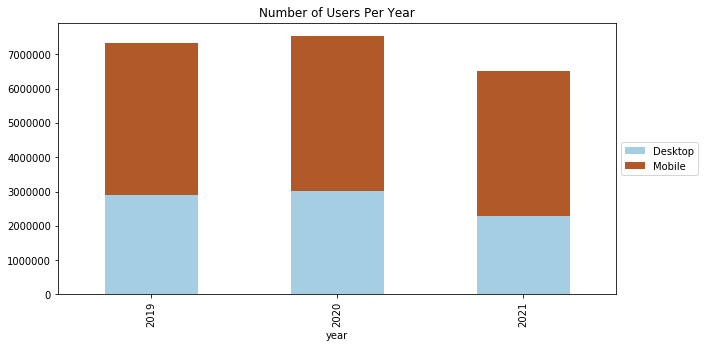

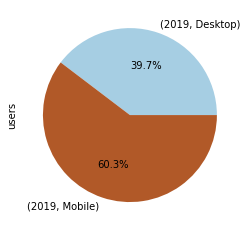

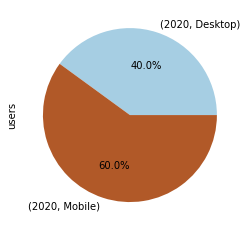

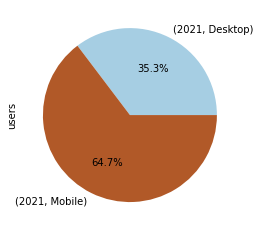

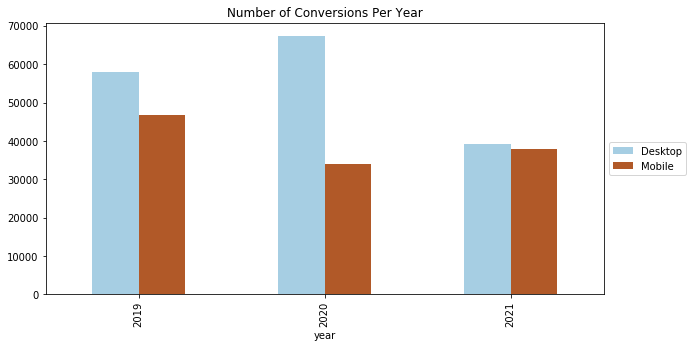

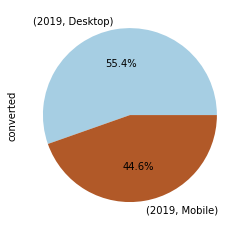

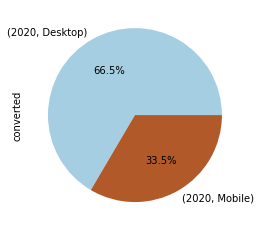

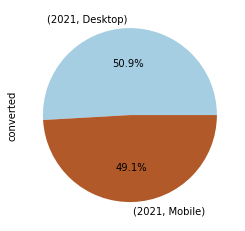

In [612]:
# Q2. How can we visualize the data to better understand it?

May_Master_DOW_Pivoted = pd.pivot_table(May_Master_File_Sortable,index=['dow','dow_sort','year'],values = ['users','converted'],columns=['device'],aggfunc=np.sum)
May_Master_Year_Pivoted = pd.pivot_table(May_Master_File_Sortable,index=['year'],values = ['users','converted'],columns=['device'],aggfunc=np.sum)
May_Master_Year_DeviceAgnostic_Pivoted = pd.pivot_table(May_Master_File_Sortable,index=['year'],values = ['users','converted'],aggfunc=np.sum)
May_Master_Device_Pivoted = pd.pivot_table(May_Master_File_Sortable,index=['year','device'],values = ['users','converted'],aggfunc=np.sum,fill_value = 0)

# Q2. Visualization 1
display(May_Master_Year_DeviceAgnostic_Pivoted)
May_Master_Year_Pivoted.plot.bar(y = 'users',stacked=True,title = "Number of Users Per Year",figsize=(10,5),colormap='Paired').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
May_Master_Device_Pivoted.groupby('year').plot.pie(y='users',colormap='Paired',autopct='%1.1f%%',subplots=True,legend= False)

#Q2. Visualization 2
May_Master_Year_Pivoted.plot.bar(y = 'converted',title = "Number of Conversions Per Year",figsize=(10,5),colormap='Paired').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
May_Master_Device_Pivoted.groupby('year').plot.pie(y='converted',colormap='Paired',autopct='%1.1f%%',subplots=True,legend= False)



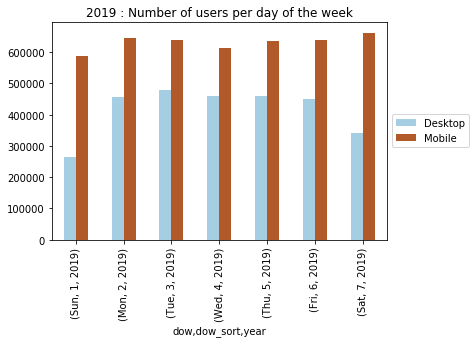

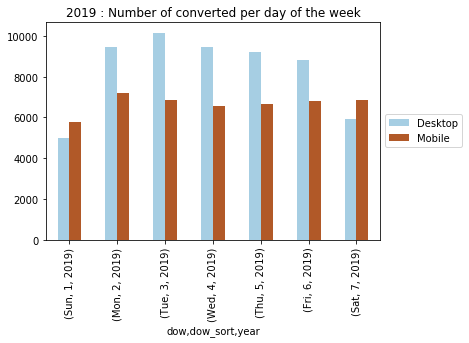

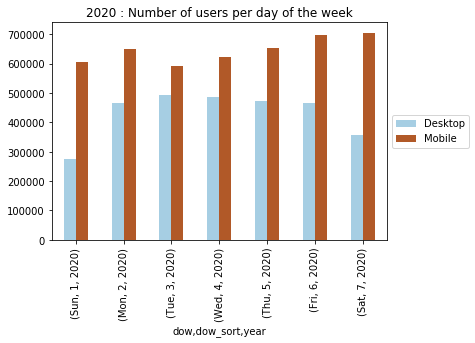

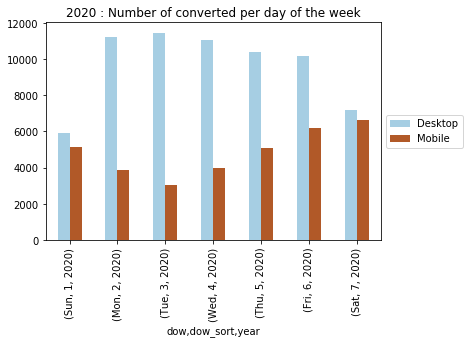

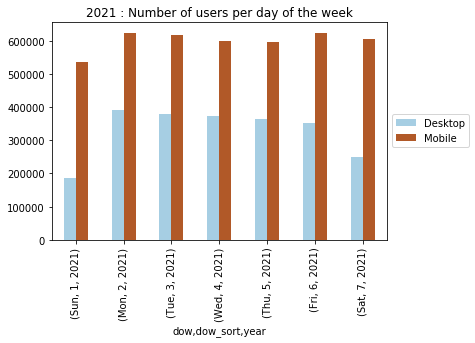

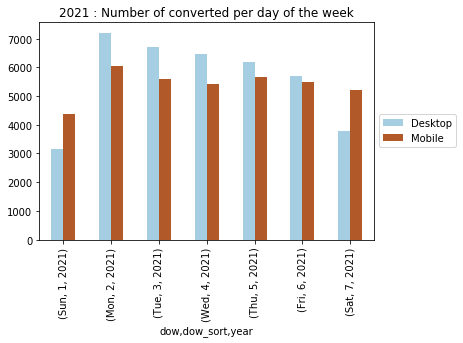

In [613]:
#Q2. Visualization 3 and 4
year_list = ['2019','2020','2021']
for year in year_list:
    Users_Conversions_Per_Dow_Bar(May_Master_DOW_Pivoted,year,'users')
    Users_Conversions_Per_Dow_Bar(May_Master_DOW_Pivoted,year,'converted')    

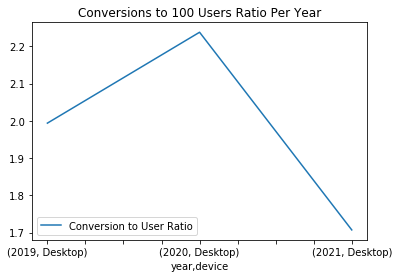

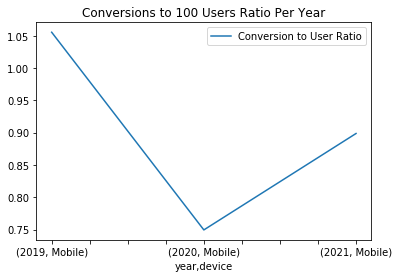

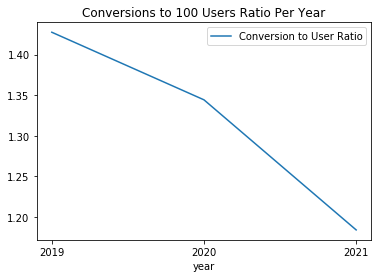

In [614]:
#Q2. Visualization 5 and 6
Add_User_Converted_Ratio(May_Master_Device_Pivoted)
May_Master_Device_Pivoted.groupby('device').plot.line(y = "Conversion to User Ratio",title = "Conversions to 100 Users Ratio Per Year")


#Q2. Visualization 7
Add_User_Converted_Ratio(May_Master_Year_DeviceAgnostic_Pivoted)
May_Master_Year_DeviceAgnostic_Pivoted.plot.line(xticks=May_Master_Year_DeviceAgnostic_Pivoted.index,y = "Conversion to User Ratio",title = "Conversions to 100 Users Ratio Per Year")




In [615]:
#Q3. What are the different groups of clients represented in the data?
# Created a dataframe of Client Master data and then used that to help determine the groups.
# Once the decided groups were defined those were added into the dataframe as well.

# Dataframe will be built from zipping up list
# Define list that will create dataframe
Client_Master_List = May_Master_File['client_id'].unique().tolist()
Client_Master_2019_List = May2019_df['client_id'].unique().tolist()
Client_Master_2020_List = May2020_df['client_id'].unique().tolist()
Client_Master_2021_List = May2021_df['client_id'].unique().tolist()

Client_Master_2019_Exist_List = []
Client_Master_2020_Exist_List = []
Client_Master_2021_Exist_List = []

Client_Master_2019Desktop_List = []
Client_Master_2019Desktop_Conv_List = []
Client_Master_2019Mobile_List = []
Client_Master_2019Mobile_Conv_List = []

Client_Master_2020Desktop_List = []
Client_Master_2020Desktop_Conv_List = []
Client_Master_2020Mobile_List = []
Client_Master_2020Mobile_Conv_List = []

Client_Master_2021Desktop_List = []
Client_Master_2021Desktop_Conv_List = []
Client_Master_2021Mobile_List = []
Client_Master_2021Mobile_Conv_List = []

user_sum_list = []
user_sum_list_2019 = []
user_sum_list_2020 = []
user_sum_list_2021 = []
conv_sum_list = []
conv_sum_list_2019 = []
conv_sum_list_2020 = []
conv_sum_list_2021 = []

Client_Year_Group_List = []
Client_Device_Group_List = []



for client in Client_Master_List:
    
    client_per_year_list(client,
                         Client_Master_2019_List,
                         May2019_df,
                         Client_Master_2019_Exist_List,
                         Client_Master_2019Desktop_List,
                         Client_Master_2019Mobile_List,
                         Client_Master_2019Desktop_Conv_List,
                         Client_Master_2019Mobile_Conv_List)
    
    client_per_year_list(client,
                         Client_Master_2020_List,
                         May2020_df,
                         Client_Master_2020_Exist_List,
                         Client_Master_2020Desktop_List,
                         Client_Master_2020Mobile_List,
                         Client_Master_2020Desktop_Conv_List,
                         Client_Master_2020Mobile_Conv_List)
    
    client_per_year_list(client,
                         Client_Master_2021_List,
                         May2021_df,
                         Client_Master_2021_Exist_List,
                         Client_Master_2021Desktop_List,
                         Client_Master_2021Mobile_List,
                         Client_Master_2021Desktop_Conv_List,
                         Client_Master_2021Mobile_Conv_List)

    client_year_group_list(client,Client_Year_Group_List, Client_Master_2019_List,Client_Master_2020_List,Client_Master_2021_List)
    client_device_group_list(client,May_Master_File,Client_Device_Group_List)

data_tuples = list(zip(Client_Master_List,
                       Client_Master_2019_Exist_List,
                       Client_Master_2019Desktop_List,
                       Client_Master_2019Desktop_Conv_List,
                       Client_Master_2019Mobile_List,
                       Client_Master_2019Mobile_Conv_List,
                       Client_Master_2020_Exist_List,
                       Client_Master_2020Desktop_List,
                       Client_Master_2020Desktop_Conv_List,
                       Client_Master_2020Mobile_List,
                       Client_Master_2020Mobile_Conv_List,
                       Client_Master_2021_Exist_List,
                       Client_Master_2021Desktop_List,
                       Client_Master_2021Desktop_Conv_List,
                       Client_Master_2021Mobile_List,
                       Client_Master_2021Mobile_Conv_List,
                       Client_Year_Group_List,
                       Client_Device_Group_List
                      ))

Client_Master_df = pd.DataFrame(data_tuples,columns=['client_id',
                                                    '2019_client',
                                                    'desktop_user_sum_2019',
                                                    'desktop_converted_sum_2019',
                                                    'mobile_user_sum_2019',
                                                    'mobile_converted_sum_2019',
                                                    '2020_client',
                                                    'desktop_user_sum_2020',
                                                    'desktop_converted_sum_2020',
                                                    'mobile_user_sum_2020',
                                                    'mobile_converted_sum_2020',
                                                    '2021_client',
                                                    'desktop_user_sum_2021',
                                                    'desktop_converted_sum_2021',
                                                    'mobile_user_sum_2021',
                                                    'mobile_converted_sum_2021',
                                                    'Client_Year_Group',
                                                    'Client_Device_Group'])

# Convert integer column to integers instead of strings
# Add sumation of user columns as well

col_list = ['desktop_user_sum_2019',
            'desktop_converted_sum_2019',
            'mobile_user_sum_2019',
            'mobile_converted_sum_2019',
            'desktop_user_sum_2020',
            'desktop_converted_sum_2020',
            'mobile_user_sum_2020',
            'mobile_converted_sum_2020',
            'desktop_user_sum_2021',
            'desktop_converted_sum_2021',
            'mobile_user_sum_2021',
            'mobile_converted_sum_2021']
for col in col_list:
    convert_col_to_int(Client_Master_df,col)
    if 'user_sum' in col:
        user_sum_list.append(col)
    if 'user_sum_2019' in col:
        user_sum_list_2019.append(col)
    if 'user_sum_2020' in col:
        user_sum_list_2020.append(col)
    if 'user_sum_2021' in col:
        user_sum_list_2021.append(col)
    if 'converted_sum' in col:
        conv_sum_list.append(col)
    if 'converted_sum_2019' in col:
        conv_sum_list_2019.append(col)
    if 'converted_sum_2020' in col:
        conv_sum_list_2020.append(col)
    if 'converted_sum_2021' in col:
        conv_sum_list_2021.append(col) 

# Add user sum lists
Client_Master_df['2019_User_Sum'] = Client_Master_df[user_sum_list_2019].sum(axis=1)
Client_Master_df['2020_User_Sum'] = Client_Master_df[user_sum_list_2020].sum(axis=1)
Client_Master_df['2021_User_Sum'] = Client_Master_df[user_sum_list_2021].sum(axis=1)
Client_Master_df['Total_User_Sum'] = Client_Master_df[user_sum_list].sum(axis=1)

# Add total converted sum columns
Client_Master_df['2019_Converted_Sum'] = Client_Master_df[conv_sum_list_2019].sum(axis=1)
Client_Master_df['2020_Converted_Sum'] = Client_Master_df[conv_sum_list_2020].sum(axis=1)
Client_Master_df['2021_Converted_Sum'] = Client_Master_df[conv_sum_list_2021].sum(axis=1)
Client_Master_df['Total_Converted_Sum'] = Client_Master_df[conv_sum_list].sum(axis=1)

# Print out Client Master to excel
Client_Master_df.to_excel("Client_Master.xlsx",sheet_name='Client_Master')

#Message to indicate cell execution is complete and Client Master is available in excel
print('Please see Client_Master.xlsx for output table.')


Please see Client_Master.xlsx for output table.


In [588]:
#Q4.What’s the difference between these groups?

    
# Difference #1
Client_Group_Average_Users_2019 = Client_Master_df[Client_Master_df['2019_client'] == 'Y'].groupby('Client_Year_Group').agg({'Total_User_Sum':[np.mean,np.std,np.size]})
Create_95Confidence_Interval(Client_Group_Average_Users_2019)
display(Client_Group_Average_Users_2019)
Client_Group_Average_Converted_2019 = Client_Master_df[Client_Master_df['2019_client'] == 'Y'].groupby('Client_Year_Group').agg({'2019_Converted_Sum':[np.mean,np.std,np.size]})
Create_95Confidence_Interval(Client_Group_Average_Converted_2019)
display(Client_Group_Average_Converted_2019)

#Difference #2
Client_Group_Average_Users_Device = Client_Master_df.groupby('Client_Device_Group').agg({'Total_User_Sum':[np.mean,np.std,np.size]})
Create_95Confidence_Interval(Client_Group_Average_Users_Device)
display(Client_Group_Average_Users_Device)
Client_Group_Average_Converted_Device = Client_Master_df.groupby('Client_Device_Group').agg({'Total_Converted_Sum':[np.mean,np.std,np.size]})
Create_95Confidence_Interval(Client_Group_Average_Converted_Device)
display(Client_Group_Average_Converted_Device)

# Observation of lack of difference between Groups 1,2,and 4.
Client_Group_Average_Users = Client_Master_df[Client_Master_df['Client_Year_Group'] != 'Group 3 - May 2019 and May 2020'].groupby('Client_Year_Group').agg({'Total_User_Sum':[np.mean,np.std,np.size]})
#display(Client_Group_Average_Users)
Create_95Confidence_Interval(Client_Group_Average_Users)
display(Client_Group_Average_Users)

Client_Group_Average_Converted = Client_Master_df[Client_Master_df['Client_Year_Group'] != 'Group 3 - May 2019 and May 2020'].groupby('Client_Year_Group').agg({'Total_Converted_Sum':[np.mean,np.std,np.size]})
Create_95Confidence_Interval(Client_Group_Average_Converted)
display(Client_Group_Average_Converted)

Total_User_Sum             ci95_hi ci95_lo
                                     mean       std   size                
Client_Year_Group                                                         
Group 1 - May 2019 Only              12390      18333  314   14407   10373
Group 3 - May 2019 and May 2020      41525      53684  183   49264   33787

2019_Converted_Sum           ci95_hi ci95_lo
                                       mean        std  size                
Client_Year_Group                                                           
Group 1 - May 2019 Only                 180         199  314    202     158 
Group 3 - May 2019 and May 2020         264         378  183    318     209

Total_User_Sum              ci95_hi ci95_lo
                                  mean       std    size                
Client_Device_Group                                                     
Group 5 - Mobile Only                12        NaN     1     NaN     NaN
Group 6 - Desktop Only             1807       3118    13    3493     120
Group 7 - Mobile and Desktop      17091      26502  1250   18552   15629

Total_Converted_Sum            ci95_hi ci95_lo
                                     mean        std   size                
Client_Device_Group                                                        
Group 5 - Mobile Only                   1         NaN     1    NaN     NaN 
Group 6 - Desktop Only                 51          58    13     83      20 
Group 7 - Mobile and Desktop          226         366  1250    246     206

Total_User_Sum             ci95_hi ci95_lo
                             mean       std   size                
Client_Year_Group                                                 
Group 1 - May 2019 Only      12390      18333  314   14407   10373
Group 2 - May 2020 Only      10731      10199  316   11850    9612
Group 4 - May 2021           14427      13824  451   15696   13157

Total_Converted_Sum           ci95_hi ci95_lo
                                mean        std  size                
Client_Year_Group                                                    
Group 1 - May 2019 Only          180         199  314    202     158 
Group 2 - May 2020 Only          161         148  316    177     144 
Group 4 - May 2021               171         264  451    195     147